# A Brief Introduction to Big Five Personality

Proposed by McCrae and Coasta (1997), Big Five personality trait structure is one of the most developed theory on personlaity. The five personality traits are labelled Extraversion, Agreeableness, Consientiousness, Neuroticism (or Emotional Stability), and Openness. Below is a brief explanation of each (transformed from Stening and Stening 2018). 

| Trait            | Description                                                                                       |
|------------------|---------------------------------------------------------------------------------------------------|
| **Extraversion** | Reflects traits like sociability, assertiveness, and the tendency to seek stimulation in social settings. |
| **Agreeableness** | Indicates a tendency toward compassion, cooperation, and a generally good-tempered attitude.       |
| **Conscientiousness** | Shows an inclination to be organized, dependable, and disciplined, often with a focus on achievement. |
| **Neuroticism** | Describes the extent to which a person experiences negative emotions and their level of emotional stability. |
| **Openness**    | Reflects intellectual curiosity, creativity, and a preference for novelty and variety.              |


# Personality Traits of Harry Potter Characters

We obtain the data about personality traits of Harry Potter characters from Stening and Stening (2018). Considering the relative importance in the series, a balance of good and bad characters, and also the "screen time" which is the complexity and ambiguity of their morals and personality, and the amount of change they underwent through the series, the study chose seven leading characters: Harry Potter, Hermione Granger, Ron Wesley, Draco Malfoy, Albus Dumbledore, Severus Snape, Lord Voldmort. The study conduct a voluntary survey filled in by school students in Australia and China. Within the three-week timeframe that was allowed, usable (i.e. fully completed) responses were received from 172 people using the English survey and 63 using the Chinese survey. As our dataset is English, we use the English-speaking students' results. Transformed into a table below:

|   Character   | Neuroticism  | Extroversion |   Openness   |Agreeableness |Conscientiousness|
|--------------|--------------|--------------|--------------|--------------|--------------|
|Ron Wesley|3.22|4.9|4.02|3.76|3.01|
|Hermine Granger|4.22|4.65|5.12|4.07|6.22|
|Albus Dumbledore|5.52|4.36|5.52|5.07|5.73|
|Lord Voldmort|3|4.36|4.27|1.95|4.88|
|Draco Malfoy|3.15|4.23|3.86|2.15|4.16|
|Harry Potter|3.85|3.92|5.13|4.11|4.36|
|Severus Snape|4.43|2.65|4.08|2.6|5.49|


# Sentence Structure and Personality Traits 
Research by Ginting (2018) suggests that extroverted individuals tend to use more compound sentences (CpdS) and compound-complex sentences (CCS), while introverted individuals prefer simple sentences (SS). This relationship indicates that sentence structure could provide insights into personality traits, specifically levels of extroversion and introversion.

# Complexity and Extraversion
Spitzley et al. (2022) identified a positive correlation between Extraversion and linguistic complexity, where complexity is measured by the average characters per word. We will apply this measure of complexity to evaluate the level of extraversion among seven characters from the Harry Potter series.

**In this project, we will:**

- Count the occurrences of compound sentences, compound-complex sentences, and simple sentences.
- Calculate their percentage relative to the total sentence count.
- Complexity Calculation: For each character, we will calculate the average characters per word.
  
This analysis will allow us to examine patterns in sentence structure that might reflect extroversion and to determine whether linguistic complexity aligns with levels of extroversion, as suggested by existing research.

**Reference:**

Ginting, S. (2018). Syntactic Complexity on Extroverted and Introverted Indonesian Language Learners’ Written Products. International Journal of      Education and Literacy Studies, 6(4), 101-106. doi:https://doi.org/10.7575/aiac.ijels.v.6n.4p.101

Spitzley, L. A., Wang, X., Chen, X., Burgoon, J. K., Dunbar, N. E., & Ge, S. (2022). Linguistic measures of personality in group discussions. Frontiers in Psychology, 13, Article 887616. https://doi.org/10.3389/fpsyg.2022.887616

Stening, R. Y., & Stening, B. W. (2020). “Magic and the Mind”: The Impact of Cultural and Linguistic Background on the Perception of Characters in Harry Potter. _Children's Literature in Education, 51,_ 285-308.

# 0. Data Processing

## Data Source

The data used for this analysis is sourced from the [Harry Potter Movies Dataset](https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset/data) on Kaggle.

## Example Data

The dataset includes the following columns:

- **Dialogue ID**: A unique identifier for each dialogue
- **Chapter ID**: The chapter in which the dialogue occurs
- **Place ID**: The location of the scene
- **Character ID**: A unique identifier for each character
- **Dialogue**: The spoken text by the character

Here is an example of the data format:

| Dialogue ID | Chapter ID | Place ID | Character ID | Dialogue |
|-------------|------------|----------|--------------|----------|
| 1           | 1          | 8        | 4            | I should have known that you would be here...Professor McGonagall. |
| 2           | 1          | 8        | 7            | Good evening, Professor Dumbledore. Are the rumours true, Albus? |
| 3           | 1          | 8        | 4            | I'm afraid so, Professor. The good, and the bad. |
| 4           | 1          | 8        | 7            | And the boy? |
| 5           | 1          | 8        | 4            | Hagrid is bringing him. |

## Data Extraction

We have obtained a CSV file that consists of dialogues, scene numbers, and character names. We then extracted the dialogues by character names using the pandas library.

In [ ]:
import pandas as pd 

# Load the CSV files
df = pd.read_csv('C:/Users/Jessi/Desktop/DS_project/Dialogue.csv', delimiter=';', encoding='latin1')

# Drop the unnecessary columns
df = df.drop(columns=['Dialogue ID', 'Chapter ID', 'Place ID'])

# Decode to utf-8
df['Dialogue'] = df['Dialogue'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')

# Group the dialogue by character_name and join the dialogue for each character
grouped_dialogue = df.groupby('Character ID')['Dialogue'].apply(lambda x: ' '.join(x)).reset_index()

print(grouped_dialogue)

     Character ID                                           Dialogue
0               1  Yes, Aunt Petunia. Yes, Uncle Vernon. He's asl...
1               2  Excuse me, do you mind? Everywhere else is ful...
2               3  Has anyone seen a toad? A boy named Neville's ...
3               4  I should have known that you would be here...P...
4               5  Professor Dumbledore, Sir. Professor McGonagal...
..            ...                                                ...
161           162            Oy! What do you two think you're doing?
162           163                        Oh, that was wicked, Harry.
163           164  Go go Gryffindor! Go go Gryffindor! Go go Gryf...
164           165                                               Yay!
165           166  Protego Maxima... Finato Duri... Repello Inimi...

[166 rows x 2 columns]


In [ ]:
import spacy
# Load an English model from spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
#extracted dialogue of Albus Dumbledore
Dumbledore_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 4]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Harry Porter
Harry_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 1]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Hermione Granger
Hermione_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 3]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Ron Weasley
Ron_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 2]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Voldemort
Voldemort_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 9]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Draco Malfoy
Malfoy_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 12]['Dialogue'].iloc[0]

In [ ]:
#extracted dialogue of Severus Snape
Snape_dia = grouped_dialogue[grouped_dialogue['Character ID'] == 6]['Dialogue'].iloc[0]

In [ ]:
#Helper function that checks if a given token (word) is part of a subordinate clause.
def is_subordinate_clause(token):
    subordinate_tags = {"advcl", "ccomp", "relcl","acl"}
    
    return token.dep_ in subordinate_tags

In [ ]:
"""
Create a helper function that counts the number of independent and subordinate clauses in a sentence.
Args:
    sentence: Sentence 
Returns:
    the independent and dependent clauses
"""
def count_clauses_per_sentence(sentence):
    independent_clauses = 0
    subordinate_clauses = 0

    # FIND INDEPENDENT CLAUSES
    for token in sentence:
        if token.dep_ == "ROOT":
            independent_clauses += 1 

        # Check for nsubj/nsubjpass immediately before conj VERB
        if token.dep_ == "conj" and token.pos_ == "VERB":
            # Ensure that we're not at the first or second token of the document
            if token.i > 0:
                prev_token = token.doc[token.i - 1] 
                if prev_token.dep_ in {"nsubj", "nsubjpass"}:
                    independent_clauses += 1
            
            if token.i > 1:
                pprev_token = token.doc[token.i - 2] 
                if pprev_token.dep_ in {"nsubj", "nsubjpass"}:
                    independent_clauses += 1

    # FIND SUBORDINATE CLAUSES
    for token in sentence:
        if is_subordinate_clause(token):  
            subordinate_clauses += 1

    return independent_clauses, subordinate_clauses

In [ ]:
"""
Create a function to count the number of compound sentences in the dialogues of each character.
Args:
    doc: the processed text by Spacy
Returns:
    the number of compound sentences
"""

def count_compound_sentences(doc):
    sent_count = 0
    #compound_sentences = []
    
    for sentence in doc.sents:
            independent_clauses = 0
            subjects = set()
            verbs = set()
            
            for token in sentence:
                # Count ROOT verbs
                if token.dep_ == "ROOT" and token.pos_ == "VERB":
                    independent_clauses += 1
                    verbs.add(token)
    
                # Count subjects
                if token.dep_ in {"nsubj", "nsubjpass"}:
                    subjects.add(token)
                    # Check if the subject's head is a verb
                    if token.head.pos_ == "VERB":
                        verbs.add(token.head)
    
                # Check for coordinating conjunctions connecting clauses
                if token.dep_ == "conj" and token.pos_ == "VERB":
                    if any(subj.head == token for subj in subjects):
                        independent_clauses += 1
                        verbs.add(token)
    
            # Check if we have at least two subjects and two verbs
            if len(subjects) >= 2 and len(verbs) >= 2 and independent_clauses > 1:
                # Additional check: ensure the sentence has a coordinating conjunction
                if any(token.pos_ == "CCONJ" for token in sentence):
                    sent_count += 1
                    #compound_sentences.append(sentence.text)
    
    return sent_count

In [ ]:
"""
Create a function to count the number of compound-complex sentences in the dialogues of each character.
Args:
    text: the processed text by Spacy
Returns:
    the number of compound-complex sentences
"""
def cc_sent(text):
    sent_count = 0
    cc_sentences = []
    
    for sent in text.sents:
        indep_count, sub_count = count_clauses_per_sentence(sent)
        # Compound-complex sentences contain at least 2 independent clauses and 1 dependent clause
        if indep_count >= 2 and sub_count >= 1:
            sent_count += 1
            cc_sentences.append(sent.text)
            
    return cc_sentences, sent_count

In [ ]:
"""
Create a function to check whether a sentence is a simple sentence. Simple Sentence contains only one subject and one predicate
Args:
    sentence: Sentence
Returns:
    True if there's only one independent clause, no subordinate clauses
"""
def is_simple_sentence(sentence):
    # Count the number of ROOT verbs (should be 1 for a simple sentence). 
    root_count = sum(1 for token in sentence if token.dep_ == "ROOT" and token.pos_ == "VERB")

    # Allow compound subjects and predicates but avoid dependent clauses
    has_subordinate_clause = any(is_subordinate_clause(token) for token in sentence) 
    
    return root_count == 1 and not has_subordinate_clause

"""
Create a function to count the number of simple sentences in the dialogues of each character.
Args:
    text: the processed text by Spacy
Returns:
    the number of simple sentences
"""
def count_simple_sentences(text):
    simple_sentence_count = 0

    for sent in text.sents:
        if is_simple_sentence(sent): 
            simple_sentence_count += 1

    return simple_sentence_count 

In [ ]:
"""
Create a function to count the total number of sentences in the dialogues of each character.
Args:
    text: The processed text by Spacy
Returns:
    The number of sentences
"""
def sent_count(text):
    sent_count = 0
    for sent in text.sents:
        sent_count += 1
    return sent_count

In [ ]:
"""
Create a function to calculate the lexical complexity
Args:
    doc: the processed text by Spacy
Returns:
    lexical complexity score
"""
def calculate_complexity(doc):
    
    # Filter tokens to include only words (exclude punctuation, spaces, etc.)
    words = [token for token in doc if token.is_alpha]
    
    # Calculate the total number of characters in words
    total_characters = sum(len(token) for token in words)
    
    # Calculate the average characters per word
    complexity = total_characters / len(words) if words else 0
    
    return complexity

In [ ]:
"""
Create a function to analyze and present sentence structure data.

Args:
    doc: The processed text by Spacy.

Returns:
    dict: A dictionary containing the following keys:
        - total_sent: Total number of sentences
        - simple_sent: Number of simple sentences
        - s_t: Percentage of simple sentences
        - cpound_t: Percentage of compound sentences
        - cc_t: Percentage of compound-complex sentences
        - cpound_count: Number of compound sentences
        - cc_count: Number of compound-complex sentences
        - complexity: Lexical complexity score (average characters per word)
"""
def analyze_sentence_structure(doc):
    
    cc_sents, cc_count = cc_sent(doc)
    cpound_count = count_compound_sentences(doc)

    total_sent = sent_count(doc)
    simple_sent = count_simple_sentences(doc)
    complexity = calculate_complexity(doc)

    #Percentage of simple sentences.
    s_t = (simple_sent / total_sent) * 100 if total_sent > 0 else 0
    
    #Percentage of compound-complex sentences.
    cc_t = (cc_count / total_sent) * 100 if total_sent > 0 else 0

    #Percentage of compound sentences.
    cpound_t = (cpound_count / total_sent) * 100 if total_sent > 0 else 0
    
    print(f"Compound-Complex Sentences: {cc_count}")
    print(f"Compound Sentences: {cpound_count}")
    print(f"Total Sentences: {total_sent}")
    print(f"Simple Sentences: {simple_sent}")
    print(f"Simple Sentences / Total Sentences: {s_t:.2f}%")
    print(f"Compound-Complex Sentences / Total Sentences: {cc_t:.2f}%")
    print(f"Compound Sentences / Total Sentences: {cpound_t:.2f}%")
    print(f"Complexity: {complexity:.2f} char per word")
    
    return {
        'total_sent': total_sent,
        'simple_sent': simple_sent,
        's_t': s_t,
        'cpound_t': cpound_t,
        'cc_t':  cc_t,
        'cpound_count' : cpound_count,
        'cc_count': cc_count,
        'complexity': complexity
    }

# 3. Result:

Recall our hypotheses on sentence-level linguitic features:
(1) Extroverted individuals tend to use more compound sentences (CpdS) and compound-complex sentences (CCS), while introverted individuals prefer simple sentences (SS).
(2) A positive correlation between Extraversion and linguistic complexity as measured by the average characters per word.

**Result Summary**

| Characters | Simple Sentences (s_t) | Compound-Complex Sentences (cc_t) | Compound Sentences (cpound_t) | Complexity |
|------------|------------------------|-----------------------------------|-------------------------------|------------|
| Albus Dumbledore| 31.17                  | 11 (1.13)                         | 15 (1.54)                     | 4.22       |
| Harry Potter    | 36.07                  | 8 (0.27)                          | 16 (0.53)                     | 3.92       |
| Hermione Granger| 34.39                  | 11 (0.78)                         | 15 (1.06)                     | 4.08       |
| Ron Wesley      | 31.60                  | 6 (0.42)                          | 8 (0.56)                      | 3.91       |
| Lord Voldmort   | 43.35                  | 2 (0.76)                          | 4 (1.52)                      | 4.04       |
| Drado Malfoy    | 37.93                  | 0 (0.00)                          | 2 (0.86)                      | 4.01       |
| Severus Snape   | 39.81                  | 4 (1.25)                          | 4 (1.25)                      | 4.25       |

### Discussion and Conclusions

Similar to the word-level results, a statistical correlation test indicates that the correlation between extraversion and sentence-level complexity is not significant (p > 0.05). However, a manual inspection of the data reveals some notable trends.

Our results suggest some support for the hypothesis that extroverted characters might use a greater proportion of compound and compound-complex sentences, aligning with the hypothesis of a preference among extroverts for more syntactically complex sentence structures. For instance, Albus Dumbledore and Hermione Granger, often portrayed as outgoing and intellectually confident, demonstrate a higher frequency of compound-complex sentences (11 occurrences each, with 1.13% and 0.78% of their dialogues respectively). Also, Albus Dumbledore and Hermione Granger also get relatively high scores in complexity (4.22 and 4.08 respectively). This supports the hypothesis that extroverted individuals tend to use more syntactically complex sentence structures.

When examining introverted characters like Draco Malfoy and Harry Potter, typically depicted as more introverted, Draco shows a lower frequency of complex sentences, with no compound-complex sentences and only 2 compound sentences (0.86% of his dialogue). Harry also exhibits a relatively low percentage of compound (0.53%) and compound-complex (0.27%) sentences. This is consistent with the notion that introverted individuals prefer simpler sentence structures.

However, the case of Severus Snape presents interesting deviations from this pattern. Often viewed as introverted, he surprisingly shows a relatively high percentage of compound sentences (1.25%) and compound-complex sentences (1.25%) in his dialogue. Also, Ron Weasley, expected to be extroverted, has a low percentage of compound sentences (0.56%) and compound-complex sentences (0.42%), indicating more introverted tendencies and contradicting our hypothesis.

A similar case occurs in complexity based on characters per word; the data do not fully support a strong positive correlation between extraversion and linguistic complexity. Characters associated with introversion, such as Snape (4.25), exhibit the highest complexity scores, while characters with lower complexity measures do not neatly correlate with extraversion.

In sum, while the observed patterns are consistent with some of our hypotheses, the lack of statistical significance suggests that these tendencies may be more nuanced and possibly influenced by factors beyond personality alone, requiring further investigation with a larger dataset or alternative complexity measures.

_© Yifei Chen, Chi Kuan Lai. 2024_

In [ ]:
doc_AB = nlp(Dumbledore_dia)

AB_result = analyze_sentence_structure(doc_AB)
AB_cc_count =  AB_result['cc_count']
AB_cpound_count = AB_result['cpound_count']
AB_s_t = AB_result['s_t']
AB_cc_t = AB_result['cc_t']
AB_cpound_t = AB_result['cpound_t']
AB_complexity = AB_result['complexity']

Compound-Complex Sentences: 11
Compound Sentences: 15
Total Sentences: 972
Simple Sentences: 303
Simple Sentences / Total Sentences: 31.17%
Compound-Complex Sentences / Total Sentences: 1.13%
Compound Sentences / Total Sentences: 1.54%
Complexity: 4.22 char per word


In [ ]:
doc_HP = nlp(Harry_dia)

HP_result = analyze_sentence_structure(doc_HP)
HP_cc_count =  HP_result['cc_count']
HP_cpound_count = HP_result['cpound_count']
HP_s_t = HP_result['s_t']
HP_cc_t = HP_result['cc_t']
HP_cpound_t = HP_result['cpound_t']
HP_complexity = HP_result['complexity']


Compound-Complex Sentences: 8
Compound Sentences: 16
Total Sentences: 3011
Simple Sentences: 1086
Simple Sentences / Total Sentences: 36.07%
Compound-Complex Sentences / Total Sentences: 0.27%
Compound Sentences / Total Sentences: 0.53%
Complexity: 3.92 char per word


In [ ]:
doc_HG = nlp(Hermione_dia)

HG_result = analyze_sentence_structure(doc_HG)
HG_cc_count =  HG_result['cc_count']
HG_cpound_count = HG_result['cpound_count']
HG_s_t = HG_result['s_t']
HG_cc_t = HG_result['cc_t']
HG_cpound_t = HG_result['cpound_t']
HG_complexity = HG_result['complexity']



Compound-Complex Sentences: 11
Compound Sentences: 15
Total Sentences: 1419
Simple Sentences: 488
Simple Sentences / Total Sentences: 34.39%
Compound-Complex Sentences / Total Sentences: 0.78%
Compound Sentences / Total Sentences: 1.06%
Complexity: 4.08 char per word


In [ ]:
doc_RW = nlp(Ron_dia)

RW_result = analyze_sentence_structure(doc_RW)
RW_cc_count =  RW_result['cc_count']
RW_cpound_count = RW_result['cpound_count']
RW_s_t = RW_result['s_t']
RW_cc_t = RW_result['cc_t']
RW_cpound_t = RW_result['cpound_t']
RW_complexity = RW_result['complexity']




Compound-Complex Sentences: 6
Compound Sentences: 8
Total Sentences: 1440
Simple Sentences: 455
Simple Sentences / Total Sentences: 31.60%
Compound-Complex Sentences / Total Sentences: 0.42%
Compound Sentences / Total Sentences: 0.56%
Complexity: 3.91 char per word


In [ ]:
doc_V = nlp(Voldemort_dia)

V_result = analyze_sentence_structure(doc_V)
V_cc_count =  V_result['cc_count']
V_cpound_count = V_result['cpound_count']
V_s_t = V_result['s_t']
V_cc_t = V_result['cc_t']
V_cpound_t = V_result['cpound_t']
V_complexity = V_result['complexity']


Compound-Complex Sentences: 2
Compound Sentences: 4
Total Sentences: 263
Simple Sentences: 114
Simple Sentences / Total Sentences: 43.35%
Compound-Complex Sentences / Total Sentences: 0.76%
Compound Sentences / Total Sentences: 1.52%
Complexity: 4.04 char per word


In [ ]:
doc_M = nlp(Malfoy_dia)

M_result = analyze_sentence_structure(doc_M)
M_cc_count =  M_result['cc_count']
M_cpound_count = M_result['cpound_count']
M_s_t = M_result['s_t']
M_cc_t = M_result['cc_t']
M_cpound_t = M_result['cpound_t']
M_complexity = M_result['complexity']

Compound-Complex Sentences: 0
Compound Sentences: 2
Total Sentences: 232
Simple Sentences: 88
Simple Sentences / Total Sentences: 37.93%
Compound-Complex Sentences / Total Sentences: 0.00%
Compound Sentences / Total Sentences: 0.86%
Complexity: 4.01 char per word


In [ ]:
doc_S = nlp(Snape_dia)

S_result = analyze_sentence_structure(doc_S)
S_cc_count =  S_result['cc_count']
S_cpound_count = S_result['cpound_count']
S_s_t = f"{S_result['s_t']}"
S_cc_t = S_result['cc_t']
S_cpound_t = S_result['cpound_t']
S_complexity = S_result['complexity']

Compound-Complex Sentences: 4
Compound Sentences: 4
Total Sentences: 319
Simple Sentences: 127
Simple Sentences / Total Sentences: 39.81%
Compound-Complex Sentences / Total Sentences: 1.25%
Compound Sentences / Total Sentences: 1.25%
Complexity: 4.25 char per word


C:\Users\Jessi\AppData\Local\Temp\ipykernel_37168\3284526577.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_sorted['Characters'], rotation=45, ha='right')
C:\Users\Jessi\AppData\Local\Temp\ipykernel_37168\3284526577.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_sorted['Characters'], rotation=45, ha='right')
C:\Users\Jessi\AppData\Local\Temp\ipykernel_37168\3284526577.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(df_sorted['Characters'], rotation=45, ha='right')
C:\Users\Jessi\AppData\Local\Temp\ipykernel_37168\3284526577.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

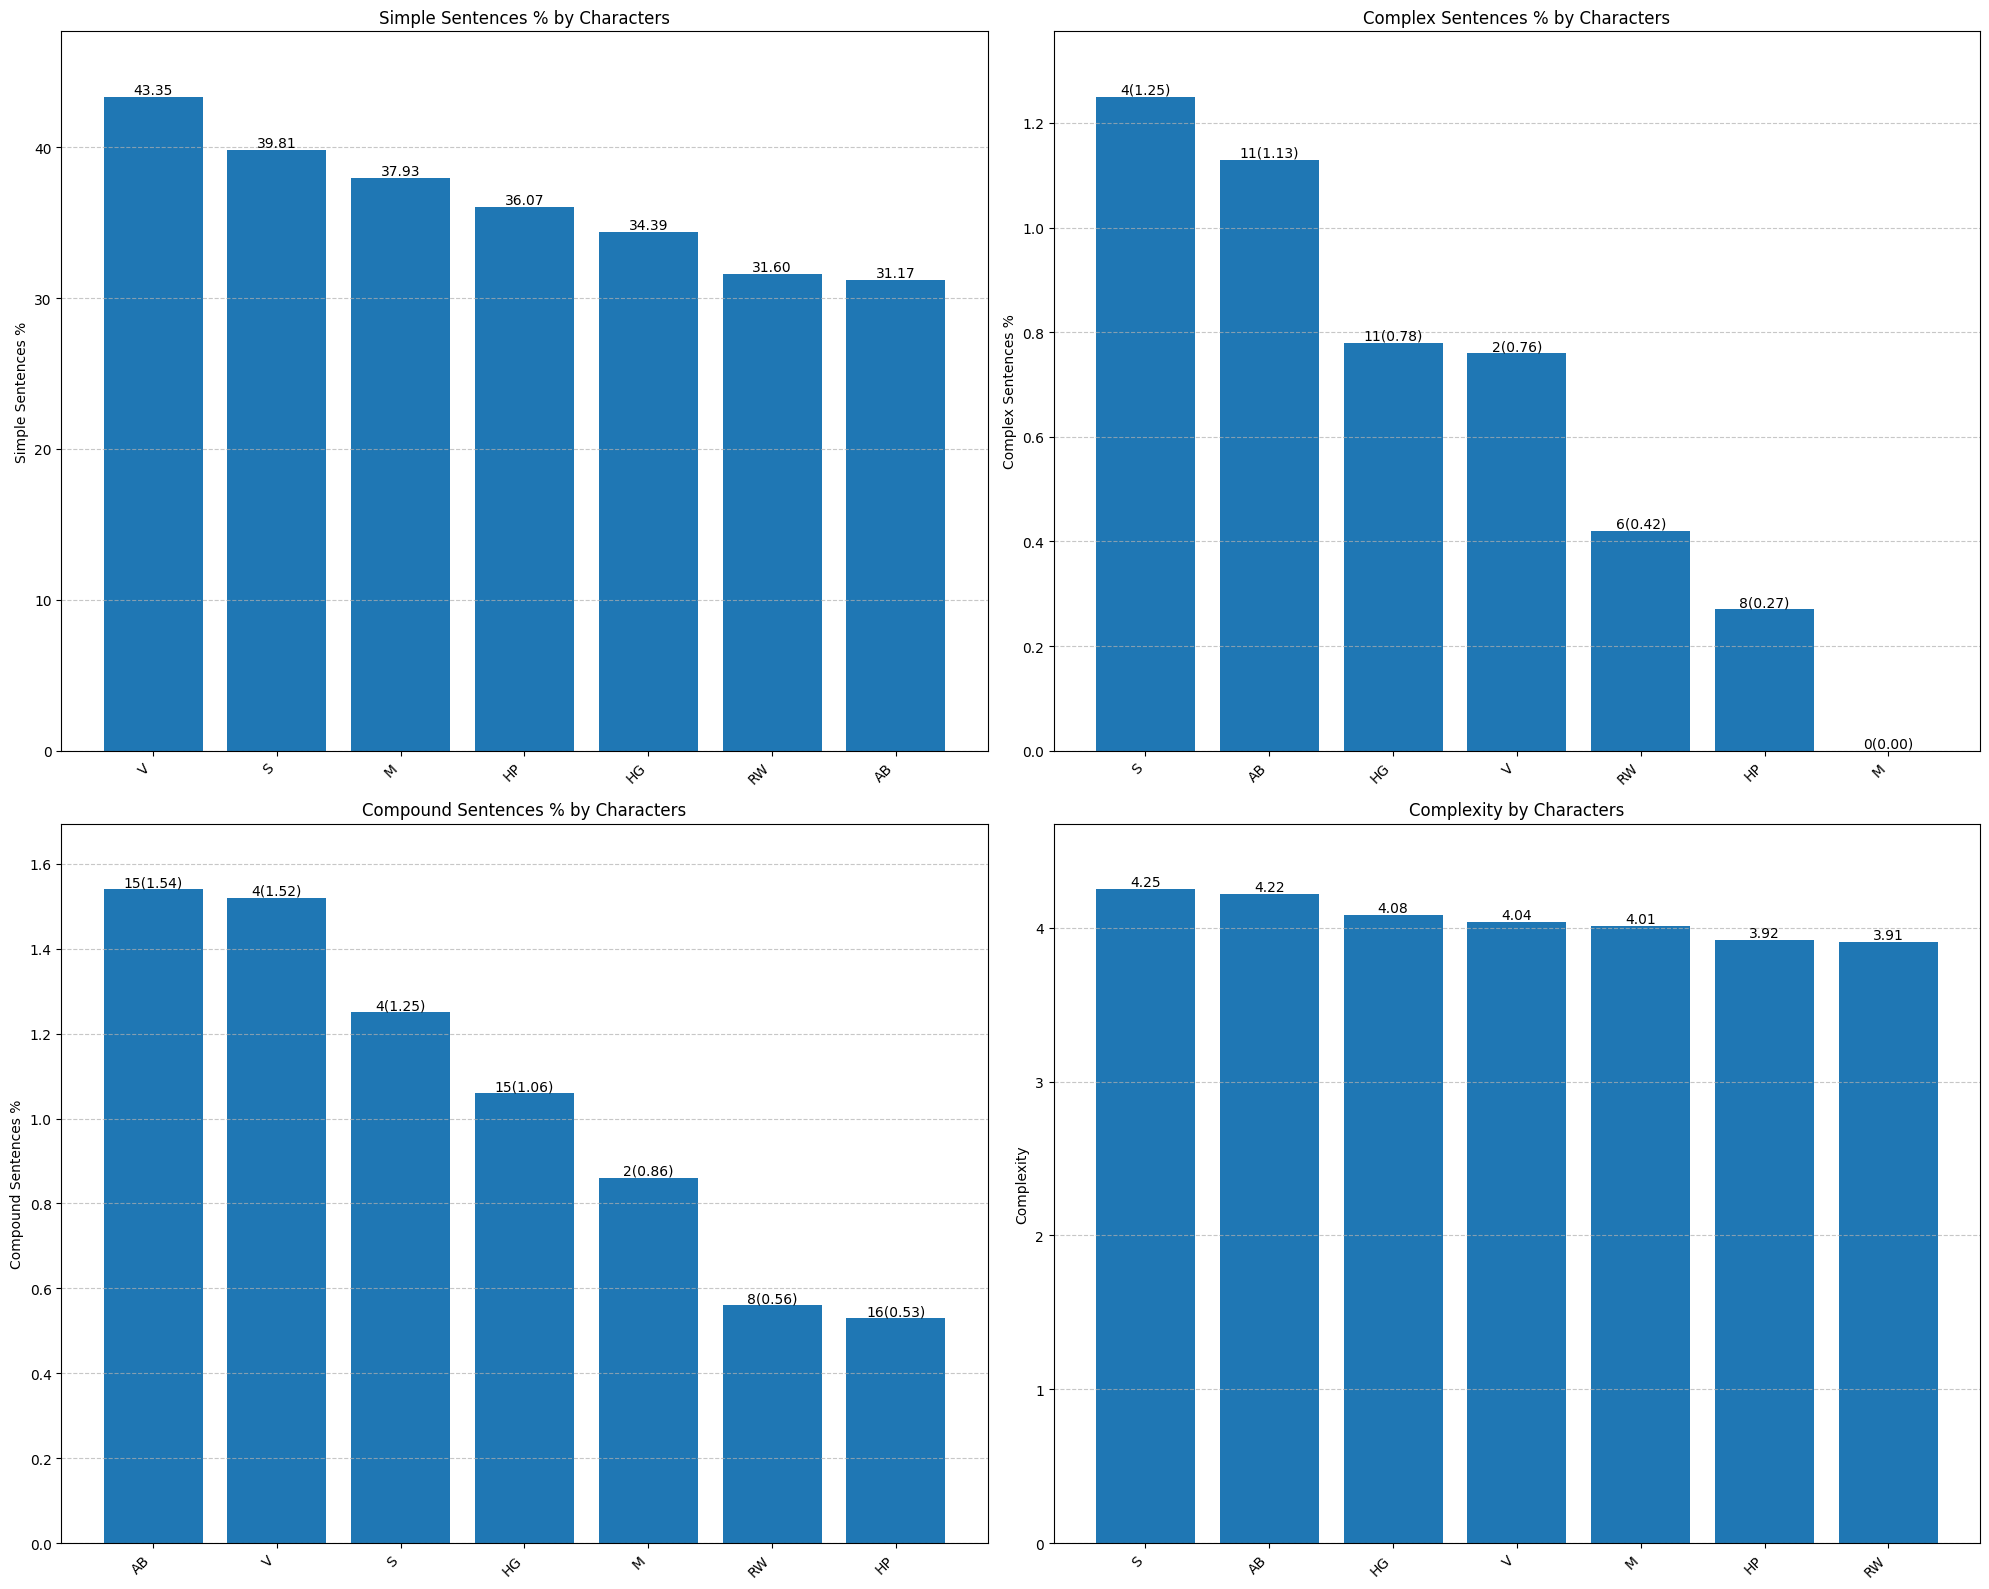

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame
data = {
    'Characters': ['AB', 'HP', 'HG', 'RW', 'V', 'M', 'S'],
    's_t': [AB_s_t, HP_s_t, HG_s_t, RW_s_t, V_s_t, M_s_t, S_s_t],
    'cc_count(cc_t)': [f"{AB_cc_count}({AB_cc_t})", f"{HP_cc_count}({HP_cc_t})", f"{HG_cc_count}({HG_cc_t})", 
                       f"{RW_cc_count}({RW_cc_t})", f"{V_cc_count}({V_cc_t})", f"{M_cc_count}({M_cc_t})", 
                       f"{S_cc_count}({S_cc_t})"],
    'cpound_count(cpound_t)': [f"{AB_cpound_count}({AB_cpound_t})", f"{HP_cpound_count}({HP_cpound_t})", 
                               f"{HG_cpound_count}({HG_cpound_t})", f"{RW_cpound_count}({RW_cpound_t})", 
                               f"{V_cpound_count}({V_cpound_t})", f"{M_cpound_count}({M_cpound_t})", 
                               f"{S_cpound_count}({S_cpound_t})"],
    'complexity': [AB_complexity, HP_complexity, HG_complexity, RW_complexity, V_complexity, M_complexity, S_complexity],
    "extravision_score": [4.36, 3.92, 4.65, 4.9, 4.36, 4.23, 2.65]
}
df = pd.DataFrame(data)

# Convert s_t to float and round off s_t and complexity to 2 decimal places
df['s_t'] = pd.to_numeric(df['s_t'], errors='coerce').round(2)
df['complexity'] = pd.to_numeric(df['complexity'], errors='coerce').round(2)

# Extract 't' values for sorting and round to 2 decimal places
df['cc_t'] = df['cc_count(cc_t)'].str.extract('\((\d+\.?\d*)\)').astype(float).round(2)
df['cpound_t'] = df['cpound_count(cpound_t)'].str.extract('\((\d+\.?\d*)\)').astype(float).round(2)

# Update cc_count(cc_t) and cpound_count(cpound_t) with rounded values
df['cc_count(cc_t)'] = df.apply(lambda row: f"{int(row['cc_count(cc_t)'].split('(')[0])}({row['cc_t']:.2f})", axis=1)
df['cpound_count(cpound_t)'] = df.apply(lambda row: f"{int(row['cpound_count(cpound_t)'].split('(')[0])}({row['cpound_t']:.2f})", axis=1)

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
axs = axs.flatten()

metrics = ['s_t', 'cc_t', 'cpound_t', 'complexity']
titles = ['Simple Sentences %', 'Complex Sentences %', 'Compound Sentences %', 'Complexity']
display_columns = ['s_t', 'cc_count(cc_t)', 'cpound_count(cpound_t)', 'complexity']

for i, (metric, title, display_col) in enumerate(zip(metrics, titles, display_columns)):
    # Sort the dataframe by the current metric
    df_sorted = df.sort_values(by=metric, ascending=False)
    
    # Create the bar chart
    axs[i].bar(df_sorted['Characters'], df_sorted[metric])
    
    # Customize the plot
    axs[i].set_ylabel(title)
    axs[i].set_title(f'{title} by Characters')
    axs[i].set_ylim(0, df_sorted[metric].max() * 1.1)  # Set y-axis limit
    
    # Add grid lines
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on top of each bar
    for j, v in enumerate(df_sorted[metric]):
        if display_col in ['cc_count(cc_t)', 'cpound_count(cpound_t)']:
            label = df_sorted[display_col].iloc[j]
        else:
            label = f'{v:.2f}'
        axs[i].text(j, v, label, ha='center', va='bottom')
    
    # Rotate x-axis labels for better readability
    axs[i].set_xticklabels(df_sorted['Characters'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro, pearsonr, spearmanr, kruskal

data_n = {
    'Characters': ['AB', 'HP', 'HG', 'RW', 'V', 'M', 'S'],
    "s_t": [31.17, 36.07, 34.39, 31.60, 43.35, 37.93, 39.81],
    "cc_t": [1.13, 0.27, 0.78, 0.42, 0.76, 0.00, 1.25],
    "cpound_t": [1.54, 0.53, 1.06, 0.56, 1.52, 0.86, 1.25],
    "complexity": [4.22, 3.92, 4.08, 3.91, 4.04, 4.01, 4.25],
    "extravision_score": [4.36, 3.92, 4.65, 4.9, 4.36, 4.23, 2.65]
}

df_n = pd.DataFrame(data_n)

print(df_n)

# Normality test for each variable
normality_results = {col: shapiro(df_n[col]) for col in df_n.columns if col != 'Characters'}

print("\nNormality Test Results (Shapiro-Wilk Test):(correct to 4 decimal places)")

for col, result in normality_results.items():
    print(f"{col}: W-statistic = {result.statistic:.4f}, p-value = {result.pvalue:.4f}")

# Correlation tests between each variable and extravision_score
correlations = {}
for col in df_n.columns[1:-1]:  # All numeric columns except extravision_score
    # Check if variables are normally distributed
    if normality_results[col].pvalue > 0.05 and normality_results['extravision_score'].pvalue > 0.05:
        # Use Pearson's correlation if both are normally distributed
        corr, p_val = pearsonr(df_n[col], df_n['extravision_score'])
        test_type = "Pearson"
    else:
        # Use Spearman's correlation otherwise
        corr, p_val = spearmanr(df_n[col], df_n['extravision_score'])
        test_type = "Spearman"
    correlations[col] = {"Correlation Type": test_type,"Correlation Coefficient": corr, "p-value": p_val}

print("\nCorrelation Test Results with Extravision Score:(correct to 4 decimal places)")

for col, result in correlations.items():
    print(f"{col}: {result['Correlation Type']} - Correlation Coefficient = {result['Correlation Coefficient']:.4f}, p-value = {result['p-value']:.4f}")

# Significance test among all numeric variables using Kruskal-Wallis test
numeric_columns = df_n.select_dtypes(include=[np.number]).columns
significance_test = kruskal(*[df_n[col] for col in numeric_columns])

print("\nKruskal-Wallis Test Result for Differences among Variables:(correct to 4 decimal places)")
print(f"H-statistic = {significance_test.statistic:.4f}, p-value = {significance_test.pvalue:.4f}")

  Characters    s_t  cc_t  cpound_t  complexity  extravision_score
0         AB  31.17  1.13      1.54        4.22               4.36
1         HP  36.07  0.27      0.53        3.92               3.92
2         HG  34.39  0.78      1.06        4.08               4.65
3         RW  31.60  0.42      0.56        3.91               4.90
4          V  43.35  0.76      1.52        4.04               4.36
5          M  37.93  0.00      0.86        4.01               4.23
6          S  39.81  1.25      1.25        4.25               2.65

Normality Test Results (Shapiro-Wilk Test):(correct to 4 decimal places)
s_t: W-statistic = 0.9579, p-value = 0.8009
cc_t: W-statistic = 0.9597, p-value = 0.8159
cpound_t: W-statistic = 0.9080, p-value = 0.3820
complexity: W-statistic = 0.9128, p-value = 0.4154
extravision_score: W-statistic = 0.8395, p-value = 0.0982

Correlation Test Results with Extravision Score:(correct to 4 decimal places)
s_t: Pearson - Correlation Coefficient = -0.4731, p-value = 0.28